この章の目的は以下のことに答えるためである。<br>
<ol>
<li>言語データを分類するにあたって、それぞれの顕著な特徴を発見する方法</li>
<li>言語処理のタスクを自動的にこなす、言語モデルの構築</li>
<li>そのモデルから言語に関する何を学ぶことができるか</li>
</ol>

上記を見ていく過程で<br>
<ul>
<li>決定木</li>
<li>単純ベイズ分類器</li>
<li>最大エントロピー分類器</li>
</ul>
などの、いくつかの重要な機械学習のテクニックをみることができる。<br>

### <font color='blue'>教師あり学習</font>

分類 : 与えられた入力に対して正しいクラスラベルを選ぶ。<br>
例<br>
<ul>
<li>電子メールがスパムかどうかを決定</li>
<li>新しい記事がどの分野に属するか</li>
<li>bankという単語が土手なのか、銀行なのか、横に傾くことなのか、銀行に何かを預けていることなのかを決定する</li>
</ul>

### <font color='blue'>性別の決定</font>

名前をより正確にモデル化するための分類器を作成する。<br>

分類器の最初のステップは、入力における素性の選択。<br>
次にその素性をどのように符号化するか。<br>

今回の例では名前の最後の文字を見るところから始める。

In [1]:
import nltk

# 抽出
def gender_features(word):
    return {'last_letter' : word[-1]}

In [2]:
# 最後の文字をみる
gender_features('Sherk')

{'last_letter': 'k'}

<font color='red'>ほとんどの分類方法では、素性を真偽値や数値、文字列などの単純なデータ型で符号化する。<font color='red'><br>

名前に関しての素性抽出器を定義した。<br>
次はサンプルデータと対応するクラスラベルを用意。<br>

In [3]:
# 男性、女性の名前を抽出
from nltk.corpus import names
import random
names = ([(name, 'male') for name in names.words('male.txt')] + [(name, 'female') for name in names.words('female.txt')])
random.shuffle(names)

In [4]:
# 名前
names

[('Larisa', 'female'),
 ('Verne', 'male'),
 ('Tomasina', 'female'),
 ('Sonnnie', 'female'),
 ('Elfrida', 'female'),
 ('Karalee', 'female'),
 ('Shaina', 'female'),
 ('Dedra', 'female'),
 ('Ugo', 'male'),
 ('Imelda', 'female'),
 ('Benita', 'female'),
 ('Shannon', 'female'),
 ('Adena', 'female'),
 ('Alfred', 'male'),
 ('Frankie', 'male'),
 ('Sioux', 'female'),
 ('Nettie', 'female'),
 ('Ainslie', 'female'),
 ('Mahesh', 'male'),
 ('Ted', 'male'),
 ('Isadore', 'male'),
 ('Annalisa', 'female'),
 ('Barnaby', 'male'),
 ('Brodie', 'male'),
 ('Timmie', 'female'),
 ('Lorri', 'female'),
 ('Ephrayim', 'male'),
 ('Trina', 'female'),
 ('Stephan', 'male'),
 ('Nessa', 'female'),
 ('Dennie', 'female'),
 ('Lulu', 'female'),
 ('Margit', 'female'),
 ('Wells', 'male'),
 ('Rodrique', 'male'),
 ('Madelena', 'female'),
 ('Patsy', 'male'),
 ('Jorie', 'female'),
 ('Susy', 'female'),
 ('Kimberlee', 'female'),
 ('Ranice', 'female'),
 ('Federica', 'female'),
 ('Junie', 'female'),
 ('Amalle', 'female'),
 ('Beryl', 'f

素性抽出器を使って名前のデータを処理。<br>
結果として得られる素性集合を訓練セットとテストセットに分ける。<br> 

In [5]:
# 素性抽出器を使って、名前のデータを処理
featuresets = [(gender_features(n), g) for (n, g) in names]

In [6]:
# 素性抽出器から得たデータの列挙
featuresets

[({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'e'}, 'male'),
 ({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'e'}, 'female'),
 ({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'e'}, 'female'),
 ({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'o'}, 'male'),
 ({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'n'}, 'female'),
 ({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'd'}, 'male'),
 ({'last_letter': 'e'}, 'male'),
 ({'last_letter': 'x'}, 'female'),
 ({'last_letter': 'e'}, 'female'),
 ({'last_letter': 'e'}, 'female'),
 ({'last_letter': 'h'}, 'male'),
 ({'last_letter': 'd'}, 'male'),
 ({'last_letter': 'e'}, 'male'),
 ({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'y'}, 'male'),
 ({'last_letter': 'e'}, 'male'),
 ({'last_letter': 'e'}, 'female'),
 ({'last_letter': 'i'}, 'female'),
 ({'last_letter': 'm'}, 'male'),
 ({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'n'}, 'male'),
 ({'las

In [7]:
# 学習データとテストデータ
train_set, test_set = featuresets[500:], featuresets[:500]

In [8]:
# 学習データ
train_set

[({'last_letter': 'y'}, 'female'),
 ({'last_letter': 'm'}, 'male'),
 ({'last_letter': 'e'}, 'female'),
 ({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'r'}, 'male'),
 ({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'e'}, 'female'),
 ({'last_letter': 'i'}, 'female'),
 ({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'y'}, 'female'),
 ({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'e'}, 'female'),
 ({'last_letter': 'd'}, 'male'),
 ({'last_letter': 'e'}, 'male'),
 ({'last_letter': 'y'}, 'female'),
 ({'last_letter': 'y'}, 'female'),
 ({'last_letter': 'd'}, 'male'),
 ({'last_letter': 'h'}, 'male'),
 ({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'e'}, 'female'),
 ({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'n'}, 'male'),
 ({'last_letter': 'd'}, 'female'),
 ({'last_letter': 'e'}, 'male'),
 ({'last_letter': 't'}, 'male'),
 ({'last_letter': 't'}, 'male'),
 ({'l

In [9]:
# テストデータ
test_set

[({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'e'}, 'male'),
 ({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'e'}, 'female'),
 ({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'e'}, 'female'),
 ({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'o'}, 'male'),
 ({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'n'}, 'female'),
 ({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'd'}, 'male'),
 ({'last_letter': 'e'}, 'male'),
 ({'last_letter': 'x'}, 'female'),
 ({'last_letter': 'e'}, 'female'),
 ({'last_letter': 'e'}, 'female'),
 ({'last_letter': 'h'}, 'male'),
 ({'last_letter': 'd'}, 'male'),
 ({'last_letter': 'e'}, 'male'),
 ({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'y'}, 'male'),
 ({'last_letter': 'e'}, 'male'),
 ({'last_letter': 'e'}, 'female'),
 ({'last_letter': 'i'}, 'female'),
 ({'last_letter': 'm'}, 'male'),
 ({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'n'}, 'male'),
 ({'las

In [10]:
# 分類器の作成
classifier = nltk.NaiveBayesClassifier.train(train_set)

以下、訓練データに出てこない名前で、分類器を試す。

In [11]:
# 名前Neoの分類
classifier.classify(gender_features('Neo'))

'male'

In [12]:
# 名前Trinityの分類
classifier.classify(gender_features('Trinity'))

'female'

テストデータについて

In [13]:
print(nltk.classify.accuracy(classifier, test_set))

0.754


最後に、どの素性が名前から性別を区別するのにもっとも効果的か<br>

In [14]:
# もっとも効果的なものを10個抜き出す
classifier.show_most_informative_features(10)

Most Informative Features
             last_letter = 'a'            female : male   =     33.1 : 1.0
             last_letter = 'k'              male : female =     32.1 : 1.0
             last_letter = 'f'              male : female =     17.2 : 1.0
             last_letter = 'p'              male : female =     12.5 : 1.0
             last_letter = 'v'              male : female =     10.5 : 1.0
             last_letter = 'd'              male : female =      9.3 : 1.0
             last_letter = 'm'              male : female =      9.0 : 1.0
             last_letter = 'o'              male : female =      7.3 : 1.0
             last_letter = 'r'              male : female =      6.6 : 1.0
             last_letter = 'w'              male : female =      5.4 : 1.0


上記から、'k'で終わる名前は女性よりも男性の方が77倍多い。<br>
この比率は尤度比と呼ばれる。<br>

大きなコーパスを使って作業をしていると、大量にメモリを消費する。<br>
対処法としてnltkの以下のものを用いる。<br>

In [15]:
# 大きなコーパスを用いる時の対処法
from nltk.classify import apply_features
train_set = apply_features(gender_features, names[500:])
test_set = apply_features(gender_features, names[:500])

### <font color='blue'>正しい素性の選択</font>

機械学習にかける際に、どのようなデータを使うか。<br>
つまり、最初にどのような素性選択を行うかということはとても重要なことになる。<br>

<font color='red'>一般的に考えられる素性選択の全ての方法を試してみて、どの素性選択が一番役にたつかを考える。</font><br>

最初の素性集合を選んだ後に<br>
その素性集合を洗練するための生産的な手法は、エラー分析という。<br>

まずはモデルを構築するための開発セット(Development Set)を選択。<br>
この開発セットは訓練セットと検証セットにさらに分割される。<br>

In [16]:
# 訓練セット
train_names = names[1500:]
# 検証セット
devtest_names = names[500:1500]
# テストセット
test_names = names[:500]

訓練セットはモデルの訓練。<br>
検証セットはエラー分析に使用される。<br>
テストセットはシステムの最終評価に利用。<br>

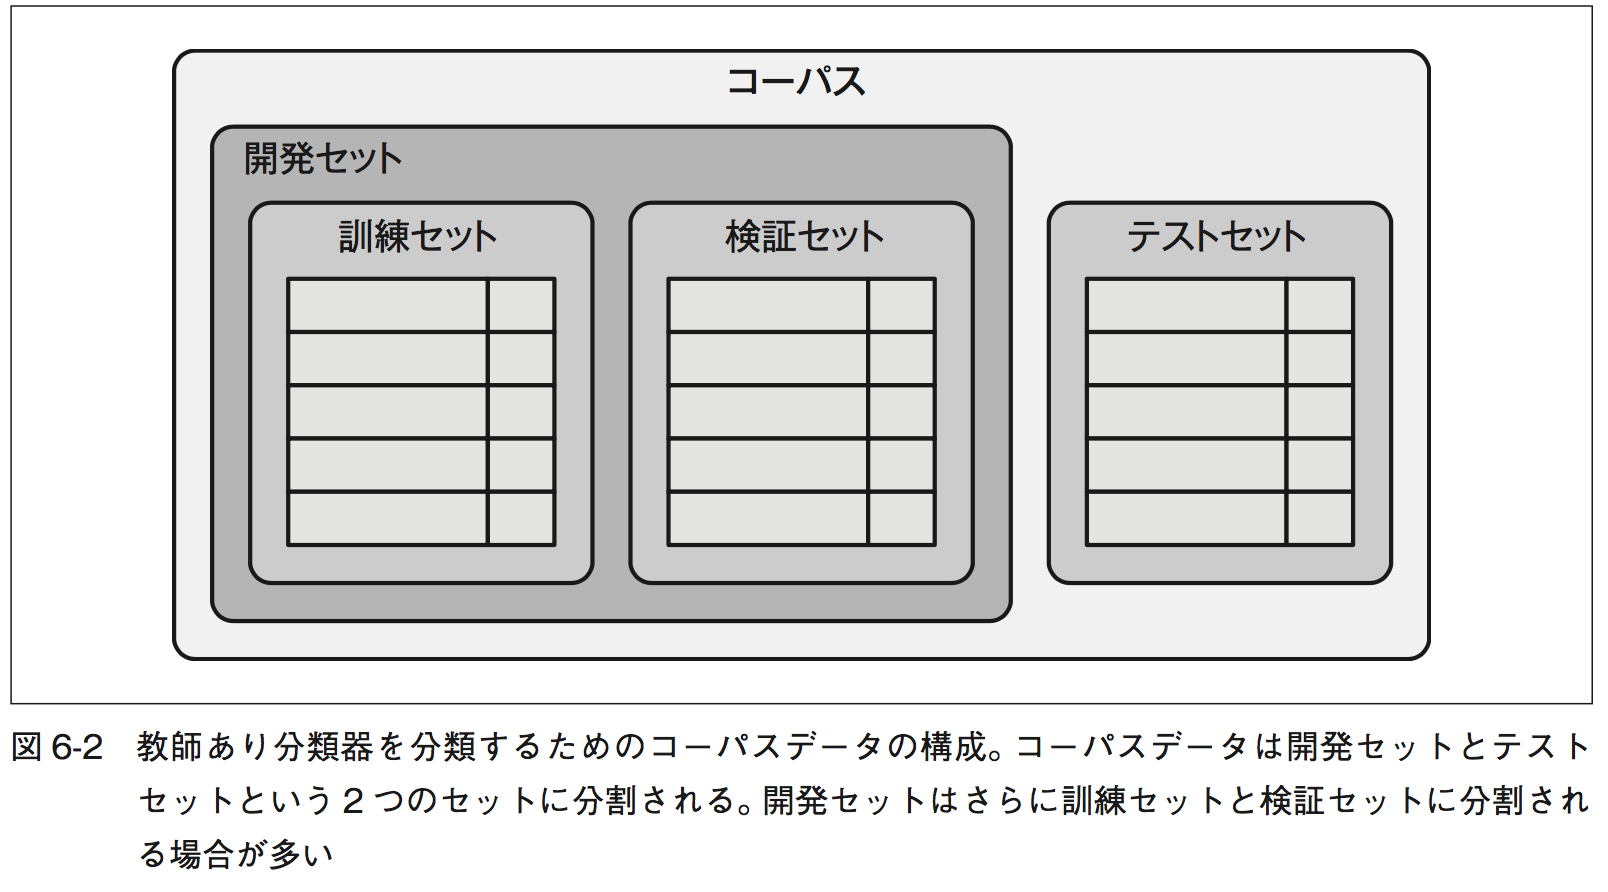

In [18]:
from IPython.display import Image
Image(filename='IMG/6-0.png', width=700)

コーパスを適切なデータセットに分割した。<br>
訓練セットを利用してモデルを構築。<br>
そのモデルに検証セットを処理させる。<br>

In [21]:
# 訓練データから、最後の文字と教師データを抽出
train_set = [(gender_features(n), g) for (n,g) in train_names]

In [22]:
train_set

[({'last_letter': 'f'}, 'male'),
 ({'last_letter': 'd'}, 'male'),
 ({'last_letter': 'e'}, 'male'),
 ({'last_letter': 'd'}, 'male'),
 ({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'f'}, 'male'),
 ({'last_letter': 's'}, 'male'),
 ({'last_letter': 'g'}, 'male'),
 ({'last_letter': 'y'}, 'male'),
 ({'last_letter': 's'}, 'male'),
 ({'last_letter': 'n'}, 'female'),
 ({'last_letter': 'e'}, 'female'),
 ({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'e'}, 'female'),
 ({'last_letter': 'n'}, 'male'),
 ({'last_letter': 'e'}, 'female'),
 ({'last_letter': 'y'}, 'female'),
 ({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'n'}, 'male'),
 ({'last_letter': 'e'}, 'female'),
 ({'last_letter': 'e'}, 'male'),
 ({'last_letter': 'l'}, 'female'),
 ({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'e'}, 'female'),
 ({'last_letter': 'k'}, 'male'),
 ({'last_letter': 'd'}, 'male'),
 ({'last_letter': 'l'}, 'female'),
 ({'last_letter': 'l'}, 'male'),
 ({'last_letter': 'e'}, 'female'),
 ({'last_letter

In [23]:
# 検証セット
devtest_set = [(gender_features(n), g) for (n,g) in devtest_names]

In [24]:
devtest_set

[({'last_letter': 'y'}, 'female'),
 ({'last_letter': 'm'}, 'male'),
 ({'last_letter': 'e'}, 'female'),
 ({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'r'}, 'male'),
 ({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'e'}, 'female'),
 ({'last_letter': 'i'}, 'female'),
 ({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'y'}, 'female'),
 ({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'e'}, 'female'),
 ({'last_letter': 'd'}, 'male'),
 ({'last_letter': 'e'}, 'male'),
 ({'last_letter': 'y'}, 'female'),
 ({'last_letter': 'y'}, 'female'),
 ({'last_letter': 'd'}, 'male'),
 ({'last_letter': 'h'}, 'male'),
 ({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'e'}, 'female'),
 ({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'n'}, 'male'),
 ({'last_letter': 'd'}, 'female'),
 ({'last_letter': 'e'}, 'male'),
 ({'last_letter': 't'}, 'male'),
 ({'last_letter': 't'}, 'male'),
 ({'l

In [25]:
# テストセット
test_set = [(gender_features(n), g) for (n,g) in test_names]

In [26]:
test_set

[({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'e'}, 'male'),
 ({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'e'}, 'female'),
 ({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'e'}, 'female'),
 ({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'o'}, 'male'),
 ({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'n'}, 'female'),
 ({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'd'}, 'male'),
 ({'last_letter': 'e'}, 'male'),
 ({'last_letter': 'x'}, 'female'),
 ({'last_letter': 'e'}, 'female'),
 ({'last_letter': 'e'}, 'female'),
 ({'last_letter': 'h'}, 'male'),
 ({'last_letter': 'd'}, 'male'),
 ({'last_letter': 'e'}, 'male'),
 ({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'y'}, 'male'),
 ({'last_letter': 'e'}, 'male'),
 ({'last_letter': 'e'}, 'female'),
 ({'last_letter': 'i'}, 'female'),
 ({'last_letter': 'm'}, 'male'),
 ({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'n'}, 'male'),
 ({'las

In [27]:
# モデルの構築
classifier = nltk.NaiveBayesClassifier.train(train_set) 

In [29]:
# モデルに対して検証セットを適用
print(nltk.classify.accuracy(classifier, devtest_set))

0.776


検証セットを利用して、分類器が予測をした際に起こした、エラーのリストを作成<br>

In [38]:
# エラーのリスト
errors = []

In [39]:
# 予測を間違えたエラーのリストを作成する
for (name, tag) in devtest_names:
    guess = classifier.classify(gender_features(name))
    if guess != tag:
        errors.append((tag, guess, name))

続いてモデルが間違えてラベル付けしたものを、個々のエラーケースとして調べる。<br>
その結果、どのような情報を加えれば正しい決定を、下せるようになるかを決定しようと試みる。<br>

上記から素性集合を調整する。<br>
ここで構築した名前の分類器は、検証セットにおいて約100個のエラーを生成。<br>

In [40]:
for (tag, guess, name) in sorted(errors):
    print('correct=%-8s guess=%-8s name=%-30s' % (tag, guess, name))

correct=female   guess=male     name=Abagail                       
correct=female   guess=male     name=Addis                         
correct=female   guess=male     name=Aigneis                       
correct=female   guess=male     name=Allyson                       
correct=female   guess=male     name=Anne-Mar                      
correct=female   guess=male     name=Aryn                          
correct=female   guess=male     name=Averyl                        
correct=female   guess=male     name=Ayn                           
correct=female   guess=male     name=Beilul                        
correct=female   guess=male     name=Beret                         
correct=female   guess=male     name=Birgit                        
correct=female   guess=male     name=Brandais                      
correct=female   guess=male     name=Brigid                        
correct=female   guess=male     name=Caren                         
correct=female   guess=male     name=Carleen    

上記の結果から、「n」で終わる名前は男性、「yn」で終わる名前の大部分が女性であることがわかる。<br>
よって以上から、2文字の接尾辞という素性を素性抽出器に含めて、このモデルを調節する。<br>

In [42]:
# 新しい素性抽出器の作成
def gender_features(word):
    return {'suffix1':word[-1:], 'suffix2':word[-2:]}

新しい素性抽出器を用いて分類器を再構築する。<br>

In [43]:
# 訓練データの作成
train_set = [(gender_features(n), g) for (n,g) in train_names]

In [44]:
train_set

[({'suffix1': 'f', 'suffix2': 'tf'}, 'male'),
 ({'suffix1': 'd', 'suffix2': 'nd'}, 'male'),
 ({'suffix1': 'e', 'suffix2': 'ie'}, 'male'),
 ({'suffix1': 'd', 'suffix2': 'rd'}, 'male'),
 ({'suffix1': 'a', 'suffix2': 'ia'}, 'female'),
 ({'suffix1': 'f', 'suffix2': 'lf'}, 'male'),
 ({'suffix1': 's', 'suffix2': 'os'}, 'male'),
 ({'suffix1': 'g', 'suffix2': 'ag'}, 'male'),
 ({'suffix1': 'y', 'suffix2': 'ry'}, 'male'),
 ({'suffix1': 's', 'suffix2': 'ss'}, 'male'),
 ({'suffix1': 'n', 'suffix2': 'en'}, 'female'),
 ({'suffix1': 'e', 'suffix2': 'ne'}, 'female'),
 ({'suffix1': 'a', 'suffix2': 'ka'}, 'female'),
 ({'suffix1': 'e', 'suffix2': 'ne'}, 'female'),
 ({'suffix1': 'n', 'suffix2': 'on'}, 'male'),
 ({'suffix1': 'e', 'suffix2': 'te'}, 'female'),
 ({'suffix1': 'y', 'suffix2': 'ty'}, 'female'),
 ({'suffix1': 'a', 'suffix2': 'la'}, 'female'),
 ({'suffix1': 'n', 'suffix2': 'en'}, 'male'),
 ({'suffix1': 'e', 'suffix2': 'ne'}, 'female'),
 ({'suffix1': 'e', 'suffix2': 'ke'}, 'male'),
 ({'suffix1': 'l

In [45]:
# 検証データの作成
devtest_set = [(gender_features(n), g) for (n,g) in devtest_names]

In [50]:
devtest_set

[({'suffix1': 'y', 'suffix2': 'ny'}, 'female'),
 ({'suffix1': 'm', 'suffix2': 'am'}, 'male'),
 ({'suffix1': 'e', 'suffix2': 'ie'}, 'female'),
 ({'suffix1': 'a', 'suffix2': 'ia'}, 'female'),
 ({'suffix1': 'a', 'suffix2': 'da'}, 'female'),
 ({'suffix1': 'r', 'suffix2': 'er'}, 'male'),
 ({'suffix1': 'a', 'suffix2': 'ia'}, 'female'),
 ({'suffix1': 'e', 'suffix2': 'ie'}, 'female'),
 ({'suffix1': 'i', 'suffix2': 'di'}, 'female'),
 ({'suffix1': 'a', 'suffix2': 'na'}, 'female'),
 ({'suffix1': 'y', 'suffix2': 'ey'}, 'female'),
 ({'suffix1': 'a', 'suffix2': 'ta'}, 'female'),
 ({'suffix1': 'a', 'suffix2': 'na'}, 'female'),
 ({'suffix1': 'e', 'suffix2': 'ee'}, 'female'),
 ({'suffix1': 'd', 'suffix2': 'rd'}, 'male'),
 ({'suffix1': 'e', 'suffix2': 'ie'}, 'male'),
 ({'suffix1': 'y', 'suffix2': 'dy'}, 'female'),
 ({'suffix1': 'y', 'suffix2': 'ny'}, 'female'),
 ({'suffix1': 'd', 'suffix2': 'ld'}, 'male'),
 ({'suffix1': 'h', 'suffix2': 'th'}, 'male'),
 ({'suffix1': 'a', 'suffix2': 'ra'}, 'female'),
 ({'

In [48]:
# 新しいモデルの作成
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [49]:
# 検証セットに対して
print(nltk.classify.accuracy(classifier, devtest_set))

0.792


In [51]:
# テストセットに対して
print(nltk.classify.accuracy(classifier, test_set))

0.64


結果が向上したことがわかる。<br>

新しく改良された分類器が生成したエラーのパターンをチェックするために<br>
このエラー分析を繰り返し行うことができる。<br>

エラー分析の手順が繰り返されるたびに、訓練セットと検証セットを作り直す。<br>

一度、検証セットが用いられると、新しく作成したモデルがどのくらいの精度を出すかわからなくなる。<br>
そこで、検証セットとは別に、テストセットを作成しておく。<br>